# Analysis of Predictions Produced with Chunks and RNNModel by Darts

This script analyzes all pickle files in `./data/darts/{n_chunks}_chunks/{style}/`, starting with `confusion_matrix`, i.e. all model-level and all chunk-level matrices. At the moment, the paths are adapted for local execution.

## Analysis of Model-level Matrices

### Define Variables to Adjust for Model-level Analyses

In [1]:
# Define number of chunks
n_chunks = 1000

# Define how many chunks were taken for prediction ('all' or '20_percent')
style = 'all'

### Extract All Generated Model-level Matrices

In [2]:
from IPython.display import display

import os
import pandas as pd
import pickle5 as pickle

# Define path to all model-level matrices produced by prediction
path_to_model_matrices = f'../../data/darts/{n_chunks}_chunks/{style}'

# Collect pickle file names of model-level matrices
model_matrix_filenames = list()

for file in os.listdir(path_to_model_matrices):
    if os.path.isfile(os.path.join(path_to_model_matrices, file)) and \
            file.startswith('confusion_matrix_models') and file.endswith('.pickle'):
        model_matrix_filenames.append(file)

# Concat all found matrices into result matrix
result_matrix_models = pd.DataFrame(columns=['ID', 'PARAMETER', 'MODEL', 'ENDOGENOUS', 'EXOGENOUS', 'FIRST_FORECAST',
                                             'ALARM_TYPE', 'FP', 'TP', 'FN', 'TN', 'N_CHUNKS', 'N_ITERATIONS'])

for filename in model_matrix_filenames:
    # Read file
    current_matrix_f = open(f'{path_to_model_matrices}/{filename}', 'rb')
    current_matrix = pickle.load(current_matrix_f)
    current_matrix_f.close()

    # Append current matrix to result matrix
    result_matrix_models = pd.concat([result_matrix_models, current_matrix])

# Sort result matrix for better readability
result_matrix_models.sort_values(by=['ID'], inplace=True)

# Reset index
result_matrix_models.reset_index(inplace=True, drop=True)

# Show result matrix per parameter
display(result_matrix_models[result_matrix_models['PARAMETER'] == 'HR'])
display(result_matrix_models[result_matrix_models['PARAMETER'] == 'BP'])
display(result_matrix_models[result_matrix_models['PARAMETER'] == 'O2'])

,ID,PARAMETER,MODEL,ENDOGENOUS,EXOGENOUS,FIRST_FORECAST,ALARM_TYPE,FP,TP,FN,TN,N_CHUNKS,N_ITERATIONS,N_HIGH_ALARMS,N_LOW_ALARMS


,ID,PARAMETER,MODEL,ENDOGENOUS,EXOGENOUS,FIRST_FORECAST,ALARM_TYPE,FP,TP,FN,TN,N_CHUNKS,N_ITERATIONS,N_HIGH_ALARMS,N_LOW_ALARMS
0,BP_R_01_H,BP,RNN,MEDIAN,n/a,13,High,81,38,72,2216,207,2407,110,73
1,BP_R_01_L,BP,RNN,MEDIAN,n/a,13,Low,95,15,58,2239,207,2407,110,73
2,BP_R_02_H,BP,RNN,MAX_MIN,MEDIAN,13,High,85,42,74,2206,207,2407,116,78
3,BP_R_02_L,BP,RNN,MAX_MIN,MEDIAN,13,Low,76,16,62,2253,207,2407,116,78
4,BP_R_03_H,BP,LSTM,MEDIAN,n/a,13,High,121,34,76,2176,207,2407,110,73
5,BP_R_03_L,BP,LSTM,MEDIAN,n/a,13,Low,219,26,47,2115,207,2407,110,73
6,BP_R_05_H,BP,GRU,MEDIAN,n/a,13,High,119,51,59,2178,207,2407,110,73
7,BP_R_05_L,BP,GRU,MEDIAN,n/a,13,Low,102,13,60,2232,207,2407,110,73
8,BP_R_06_H,BP,GRU,MAX_MIN,MEDIAN,13,High,98,29,87,2193,207,2407,116,78
9,BP_R_06_L,BP,GRU,MAX_MIN,MEDIAN,13,Low,394,40,38,1935,207,2407,116,78


,ID,PARAMETER,MODEL,ENDOGENOUS,EXOGENOUS,FIRST_FORECAST,ALARM_TYPE,FP,TP,FN,TN,N_CHUNKS,N_ITERATIONS,N_HIGH_ALARMS,N_LOW_ALARMS
20,O2_R_01_H,O2,RNN,MEDIAN,n/a,13,High,256,18,0,11443,438,11718,18,228
21,O2_R_01_L,O2,RNN,MEDIAN,n/a,13,Low,43,33,195,11446,438,11718,18,228
22,O2_R_03_H,O2,LSTM,MEDIAN,n/a,13,High,581,17,1,11118,438,11718,18,228
23,O2_R_03_L,O2,LSTM,MEDIAN,n/a,13,Low,245,57,171,11244,438,11718,18,228
24,O2_R_08_H,O2,RNN,MAX_MIN,MEDIAN,13,High,2,18,0,11697,438,11718,18,271
25,O2_R_08_L,O2,RNN,MAX_MIN,MEDIAN,13,Low,17,23,248,11429,438,11718,18,271


### Add Accuracy Metrics and Save as Parquet Files (Normal + Scaled)

In [3]:
# Calculate metrics (see https://en.wikipedia.org/wiki/Sensitivity_and_specificity for more information)
result_matrix_models['FPR'] = result_matrix_models['FP'] / (result_matrix_models['FP'] + result_matrix_models['TN'])
result_matrix_models['TPR'] = result_matrix_models['TP'] / (result_matrix_models['TP'] + result_matrix_models['FN'])
result_matrix_models['FNR'] = result_matrix_models['FN'] / (result_matrix_models['TP'] + result_matrix_models['FN'])
result_matrix_models['TNR'] = result_matrix_models['TN'] / (result_matrix_models['FP'] + result_matrix_models['TN'])

result_matrix_models['ACC'] = (result_matrix_models['TP'] + result_matrix_models['TN']) / \
                              (result_matrix_models['TP'] + result_matrix_models['FN'] + result_matrix_models['FP'] + result_matrix_models['TN'])
result_matrix_models['F1S'] = result_matrix_models['TP'] / \
                              (result_matrix_models['TP'] + 0.5 * (result_matrix_models['FP'] + result_matrix_models['FN']))

# Round all floats to 4 decimal places
# Note: round() does not work for floats with many decimal places
decimals = 4
for col in ['FPR', 'TPR', 'FNR', 'TNR', 'ACC', 'F1S']:
    result_matrix_models[col] = result_matrix_models[col].apply(lambda x: round(x, decimals))

# Move cols to end for similarity with ARIMA results
result_matrix_models = result_matrix_models[['ID', 'PARAMETER', 'MODEL', 'ENDOGENOUS', 'EXOGENOUS', 'FIRST_FORECAST',
                                             'ALARM_TYPE', 'FP', 'TP', 'FN', 'TN', 'FPR', 'TPR', 'FNR', 'TNR', 'ACC',
                                             'F1S', 'N_HIGH_ALARMS', 'N_LOW_ALARMS', 'N_CHUNKS', 'N_ITERATIONS']]

# Extract normal and scaled rows (see model number in comment below)
if style == 'all':
    # Model numbers from 07 to 12
    normal_model_numbers = ['0' + str(nr) if nr < 10 else str(nr) for nr in list(range(13))][7:]
    # Model numbers from 01 to 06
    scaled_model_numbers = ['0' + str(nr) for nr in list(range(7))][1:]
else:
    # Model numbers from 10 to 18
    normal_model_numbers = [str(nr) for nr in list(range(20))][10:]
    # Model numbers from 01 to 09
    scaled_model_numbers = ['0' + str(nr) for nr in list(range(10))][1:]

normal_rows, scaled_rows = list(), list()

"""
Normal:
    RNN,     MEDIAN:  10
    RNN,     MAX:     11 -> best for BP (1,000 chunks & one window)
    RNN,     MIN:     12 -> best for HR (1,000 chunks & one window)
    LSTM,    MEDIAN:  13
    LSTM,    MAX:     14
    LSTM,    MIN:     15
    GRU,     MEDIAN:  16
    GRU,     MAX:     17 -> best for O2 (1,000 chunks & one window)
    GRU,     MIN:     18

Scaled:
    RNN,     MEDIAN:  01
    RNN,     MAX:     02
    RNN,     MIN:     03
    LSTM,    MEDIAN:  04
    LSTM,    MAX:     05
    LSTM,    MIN:     06
    GRU,     MEDIAN:  07
    GRU,     MAX:     08
    GRU,     MIN:     09
"""

for i, row in result_matrix_models.iterrows():
    if row['ID'].split('_')[2] in normal_model_numbers:
        normal_rows.append(row.values)
    elif row['ID'].split('_')[2] in scaled_model_numbers:
        scaled_rows.append(row.values)

# Add extracted rows to final matrices
result_matrix_models_normal = (pd.DataFrame(normal_rows, columns=result_matrix_models.columns)).reset_index(drop=True)
result_matrix_models_scaled = (pd.DataFrame(scaled_rows, columns=result_matrix_models.columns)).reset_index(drop=True)

# Show complemented result matrices per parameter
display(result_matrix_models_normal[result_matrix_models_normal['PARAMETER'] == 'HR'])
display(result_matrix_models_scaled[result_matrix_models_scaled['PARAMETER'] == 'HR'])

display(result_matrix_models_normal[result_matrix_models_normal['PARAMETER'] == 'BP'])
display(result_matrix_models_scaled[result_matrix_models_scaled['PARAMETER'] == 'BP'])

display(result_matrix_models_normal[result_matrix_models_normal['PARAMETER'] == 'O2'])
display(result_matrix_models_scaled[result_matrix_models_scaled['PARAMETER'] == 'O2'])

# Save result matrices as parquet
result_matrix_models_normal.to_parquet(f'../../data/darts/{n_chunks}_chunks/{style}/result_matrix_models_normal.parquet',
                                       engine='pyarrow')
result_matrix_models_scaled.to_parquet(f'../../data/darts/{n_chunks}_chunks/{style}/result_matrix_models_scaled.parquet',
                                       engine='pyarrow')

,ID,PARAMETER,MODEL,ENDOGENOUS,EXOGENOUS,FIRST_FORECAST,ALARM_TYPE,FP,TP,FN,...,FPR,TPR,FNR,TNR,ACC,F1S,N_HIGH_ALARMS,N_LOW_ALARMS,N_CHUNKS,N_ITERATIONS


,ID,PARAMETER,MODEL,ENDOGENOUS,EXOGENOUS,FIRST_FORECAST,ALARM_TYPE,FP,TP,FN,...,FPR,TPR,FNR,TNR,ACC,F1S,N_HIGH_ALARMS,N_LOW_ALARMS,N_CHUNKS,N_ITERATIONS


,ID,PARAMETER,MODEL,ENDOGENOUS,EXOGENOUS,FIRST_FORECAST,ALARM_TYPE,FP,TP,FN,...,FPR,TPR,FNR,TNR,ACC,F1S,N_HIGH_ALARMS,N_LOW_ALARMS,N_CHUNKS,N_ITERATIONS
0,BP_R_07_H,BP,RNN,MEDIAN,n/a,13,High,28,39,71,...,0.0122,0.3545,0.6455,0.9878,0.9589,0.4407,110,73,207,2407
1,BP_R_07_L,BP,RNN,MEDIAN,n/a,13,Low,39,16,57,...,0.0167,0.2192,0.7808,0.9833,0.9601,0.2500,110,73,207,2407
2,BP_R_08_H,BP,RNN,MAX_MIN,MEDIAN,13,High,27,30,86,...,0.0118,0.2586,0.7414,0.9882,0.9531,0.3468,116,78,207,2407
3,BP_R_08_L,BP,RNN,MAX_MIN,MEDIAN,13,Low,7,7,71,...,0.0030,0.0897,0.9103,0.9970,0.9676,0.1522,116,78,207,2407
4,BP_R_09_H,BP,LSTM,MEDIAN,n/a,13,High,27,38,72,...,0.0118,0.3455,0.6545,0.9882,0.9589,0.4343,110,73,207,2407
5,BP_R_09_L,BP,LSTM,MEDIAN,n/a,13,Low,14,6,67,...,0.0060,0.0822,0.9178,0.9940,0.9663,0.1290,110,73,207,2407
6,BP_R_11_H,BP,GRU,MEDIAN,n/a,13,High,31,40,70,...,0.0135,0.3636,0.6364,0.9865,0.9580,0.4420,110,73,207,2407
7,BP_R_11_L,BP,GRU,MEDIAN,n/a,13,Low,37,11,62,...,0.0159,0.1507,0.8493,0.9841,0.9589,0.1818,110,73,207,2407
8,BP_R_12_H,BP,GRU,MAX_MIN,MEDIAN,13,High,42,44,72,...,0.0183,0.3793,0.6207,0.9817,0.9526,0.4356,116,78,207,2407
9,BP_R_12_L,BP,GRU,MAX_MIN,MEDIAN,13,Low,12,4,74,...,0.0052,0.0513,0.9487,0.9948,0.9643,0.0851,116,78,207,2407


,ID,PARAMETER,MODEL,ENDOGENOUS,EXOGENOUS,FIRST_FORECAST,ALARM_TYPE,FP,TP,FN,...,FPR,TPR,FNR,TNR,ACC,F1S,N_HIGH_ALARMS,N_LOW_ALARMS,N_CHUNKS,N_ITERATIONS
0,BP_R_01_H,BP,RNN,MEDIAN,n/a,13,High,81,38,72,...,0.0353,0.3455,0.6545,0.9647,0.9364,0.3319,110,73,207,2407
1,BP_R_01_L,BP,RNN,MEDIAN,n/a,13,Low,95,15,58,...,0.0407,0.2055,0.7945,0.9593,0.9364,0.1639,110,73,207,2407
2,BP_R_02_H,BP,RNN,MAX_MIN,MEDIAN,13,High,85,42,74,...,0.0371,0.3621,0.6379,0.9629,0.9339,0.3457,116,78,207,2407
3,BP_R_02_L,BP,RNN,MAX_MIN,MEDIAN,13,Low,76,16,62,...,0.0326,0.2051,0.7949,0.9674,0.9427,0.1882,116,78,207,2407
4,BP_R_03_H,BP,LSTM,MEDIAN,n/a,13,High,121,34,76,...,0.0527,0.3091,0.6909,0.9473,0.9182,0.2566,110,73,207,2407
5,BP_R_03_L,BP,LSTM,MEDIAN,n/a,13,Low,219,26,47,...,0.0938,0.3562,0.6438,0.9062,0.8895,0.1635,110,73,207,2407
6,BP_R_05_H,BP,GRU,MEDIAN,n/a,13,High,119,51,59,...,0.0518,0.4636,0.5364,0.9482,0.9260,0.3643,110,73,207,2407
7,BP_R_05_L,BP,GRU,MEDIAN,n/a,13,Low,102,13,60,...,0.0437,0.1781,0.8219,0.9563,0.9327,0.1383,110,73,207,2407
8,BP_R_06_H,BP,GRU,MAX_MIN,MEDIAN,13,High,98,29,87,...,0.0428,0.2500,0.7500,0.9572,0.9231,0.2387,116,78,207,2407
9,BP_R_06_L,BP,GRU,MAX_MIN,MEDIAN,13,Low,394,40,38,...,0.1692,0.5128,0.4872,0.8308,0.8205,0.1562,116,78,207,2407


,ID,PARAMETER,MODEL,ENDOGENOUS,EXOGENOUS,FIRST_FORECAST,ALARM_TYPE,FP,TP,FN,...,FPR,TPR,FNR,TNR,ACC,F1S,N_HIGH_ALARMS,N_LOW_ALARMS,N_CHUNKS,N_ITERATIONS
10,O2_R_08_H,O2,RNN,MAX_MIN,MEDIAN,13,High,2,18,0,...,0.0002,1.0000,0.0000,0.9998,0.9998,0.9474,18,271,438,11718
11,O2_R_08_L,O2,RNN,MAX_MIN,MEDIAN,13,Low,17,23,248,...,0.0015,0.0849,0.9151,0.9985,0.9774,0.1479,18,271,438,11718


,ID,PARAMETER,MODEL,ENDOGENOUS,EXOGENOUS,FIRST_FORECAST,ALARM_TYPE,FP,TP,FN,...,FPR,TPR,FNR,TNR,ACC,F1S,N_HIGH_ALARMS,N_LOW_ALARMS,N_CHUNKS,N_ITERATIONS
10,O2_R_01_H,O2,RNN,MEDIAN,n/a,13,High,256,18,0,...,0.0219,1.0000,0.0000,0.9781,0.9782,0.1233,18,228,438,11718
11,O2_R_01_L,O2,RNN,MEDIAN,n/a,13,Low,43,33,195,...,0.0037,0.1447,0.8553,0.9963,0.9797,0.2171,18,228,438,11718
12,O2_R_03_H,O2,LSTM,MEDIAN,n/a,13,High,581,17,1,...,0.0497,0.9444,0.0556,0.9503,0.9503,0.0552,18,228,438,11718
13,O2_R_03_L,O2,LSTM,MEDIAN,n/a,13,Low,245,57,171,...,0.0213,0.2500,0.7500,0.9787,0.9645,0.2151,18,228,438,11718


### Defining Variables for All Model-level Plots

In [4]:
# Avoid error because of non-found values
available_parameters = pd.unique(result_matrix_models.PARAMETER)

# Only plot columns for available parameters
n_cols = len(available_parameters)

### Plot Accuracy, TPR, FNR, and TNR

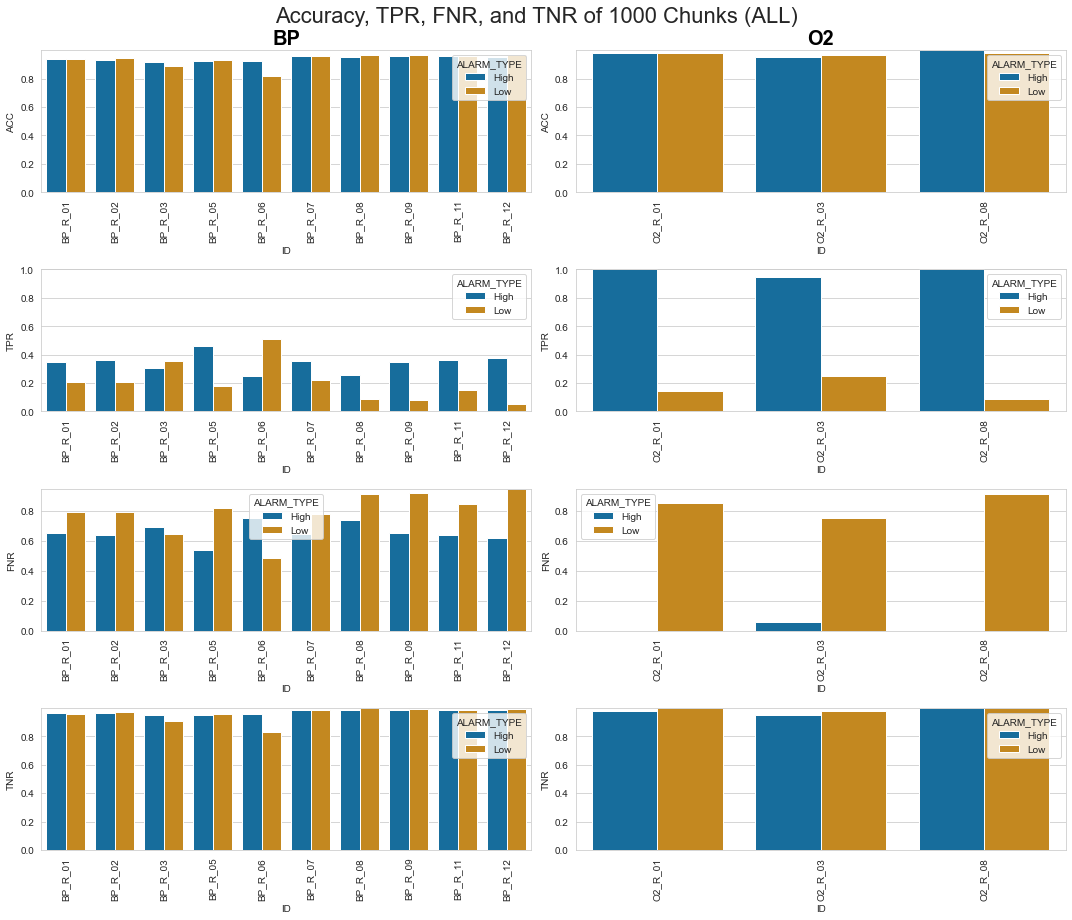

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# "Group" result matrix by prefix of ID
plotdata = result_matrix_models.replace(['_H', '_L'], ['', ''], regex=True)

# Create subplots
sns.set_style('whitegrid')
fig, axs = plt.subplots(
    nrows=4,
    ncols=n_cols,
    figsize=(15, 13),
    dpi=72
    )

plt.suptitle(f'Accuracy, TPR, FNR, and TNR of {n_chunks} Chunks ({style.replace("_", " ").upper()})', fontsize=22)

# Define y-limits
acc_ylimits = [0, max(result_matrix_models.ACC)]
tpr_ylimits = [0, max(result_matrix_models.TPR)]
fnr_ylimits = [0, max(result_matrix_models.FNR)]
tnr_ylimits = [0, max(result_matrix_models.TNR)]

# Actual plots
for i, parameter in enumerate(available_parameters):
    sns.barplot(
        ax=axs[0, i],
        data=plotdata[plotdata.PARAMETER == parameter],
        x='ID',
        y='ACC',
        hue='ALARM_TYPE',
        palette=sns.color_palette('colorblind'),
        ci=None)
    axs[0, i].set_title(str(parameter), fontweight='bold', color= 'black', fontsize=20)
    axs[0, i].set_ylim(acc_ylimits)
    axs[0, i].set_xticklabels(axs[0, i].get_xticklabels(), rotation=90)

    sns.barplot(
        ax=axs[1, i],
        data=plotdata[plotdata.PARAMETER == parameter],
        x='ID',
        y='TPR',
        hue='ALARM_TYPE',
        palette=sns.color_palette('colorblind'),
        ci=None)
    axs[1, i].set_ylim(tpr_ylimits)
    axs[1, i].set_xticklabels(axs[1, i].get_xticklabels(), rotation=90)

    sns.barplot(
        ax=axs[2, i],
        data=plotdata[plotdata.PARAMETER == parameter],
        x='ID',
        y='FNR',
        hue='ALARM_TYPE',
        palette=sns.color_palette('colorblind'),
        ci=None)
    axs[2, i].set_ylim(fnr_ylimits)
    axs[2, i].set_xticklabels(axs[2, i].get_xticklabels(), rotation=90)

    sns.barplot(
        ax = axs[3, i],
        data = plotdata[plotdata.PARAMETER == parameter],
        x='ID',
        y='TNR',
        hue='ALARM_TYPE',
        palette=sns.color_palette('colorblind'),
        ci=None)
    axs[3, i].set_ylim(tnr_ylimits)
    axs[3, i].set_xticklabels(axs[3, i].get_xticklabels(), rotation=90)

fig.tight_layout()
plt.show(fig)
#fig.savefig(f'../../plots/darts/{n_chunks}_chunks/{style}/tpr_fnr_tnr_acc_model_result_matrix.png', dpi=1200)

### Plot False Positive Ratio and F1 Score

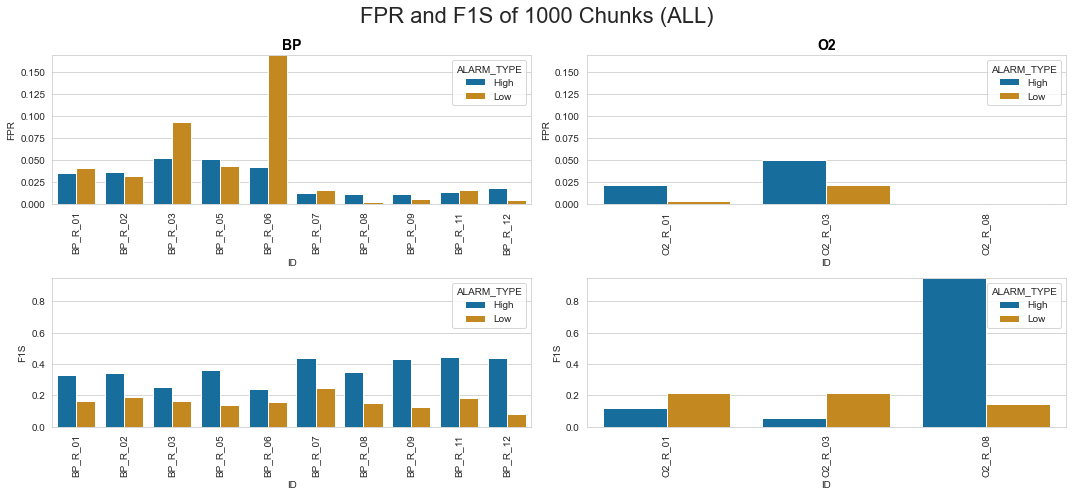

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# "Group" result matrix by prefix of ID
plotdata = result_matrix_models.replace(['_H', '_L'], ['', ''], regex=True)

# Create subplots
sns.set_style('whitegrid')
fig, axs = plt.subplots(
    nrows=2,
    ncols=n_cols,
    figsize=(15, 7),
    dpi=72
    )

plt.suptitle(f'FPR and F1S of {n_chunks} Chunks ({style.replace("_", " ").upper()})', fontsize=22)

# Define y-limits
fpr_ylimits = [0, max(result_matrix_models.FPR)]
f1s_ylimits = [0, max(result_matrix_models.F1S)]

# Actual plot
for i, parameter in enumerate(available_parameters):

    sns.barplot(
        ax=axs[0, i],
        data=plotdata[plotdata.PARAMETER == parameter],
        x='ID',
        y='FPR',
        hue='ALARM_TYPE',
        palette=sns.color_palette('colorblind'),
        ci=None)
    axs[0, i].set_title(str(parameter), fontweight='bold', color= 'black', fontsize=14)
    axs[0, i].set_ylim(fpr_ylimits)
    axs[0, i].set_xticklabels(axs[0, i].get_xticklabels(), rotation=90)

    sns.barplot(
        ax=axs[1, i],
        data=plotdata[plotdata.PARAMETER == parameter],
        x='ID',
        y='F1S',
        hue='ALARM_TYPE',
        palette=sns.color_palette('colorblind'),
        ci=None)
    axs[1, i].set_ylim(f1s_ylimits)
    axs[1, i].set_xticklabels(axs[1, i].get_xticklabels(), rotation=90)

fig.tight_layout()
plt.show(fig)
#fig.savefig(f'../../plots/darts/{n_chunks}_chunks/{style}/fpr_f1s_model_result_matrix.png', dpi=1200)

## Analysis of Chunk-level Matrices

The following analysis steps are only performed for one chunk-specific matrix file.

### Define Variables to Adjust for Model-level Analyses

In [ ]:
# Adjust variables defining path
n_chunks = 1000
style = 'all'

# Adjust variables defining model
version = 'normal'
model_type = 'LSTM'
parameter = 'o2'
endogenous_input = 'MEDIAN'

# Adjust variable defining selected amount of chunks
window_idx = 0

# Adjust variable for correlation plot
input_length = 12

### Print One Chunk-level Matrix

In [ ]:
import pickle5 as pickle

# Define path to all chunk-level matrices produced by prediction
path_to_chunk_matrices = f'../../data/darts/{n_chunks}_chunks/{style}'

# Read chunk-specific matrix
chunks_matrix_f = open(f'{path_to_chunk_matrices}/confusion_matrix_chunks_{model_type}_{parameter}_{endogenous_input}_'
                       f'{version}_window{window_idx}.pickle', 'rb')
chunks_matrix = pickle.load(chunks_matrix_f)
chunks_matrix_f.close()

# Show chunk-specific matrix
display(chunks_matrix)

### Add Metrics to Each Chunk

In [ ]:
import numpy as np

# Note: To avoid dividing by zero, zeros are converted to NaN before division (since any value divided by NaN gives NaN)

chunks_matrix['fp_tn_divisor'] = chunks_matrix['FP'] + chunks_matrix['TN']
chunks_matrix['TNR'] = chunks_matrix.TN.div(chunks_matrix.fp_tn_divisor.where(chunks_matrix.fp_tn_divisor != 0, np.nan))
chunks_matrix['FPR'] = chunks_matrix.FP.div(chunks_matrix.fp_tn_divisor.where(chunks_matrix.fp_tn_divisor != 0, np.nan)) # 1 - TNR

chunks_matrix['fn_tp_divisor'] = chunks_matrix['FN'] + chunks_matrix['TP']
chunks_matrix['TPR'] = chunks_matrix.TP.div(chunks_matrix.fn_tp_divisor.where(chunks_matrix.fn_tp_divisor != 0, np.nan))
chunks_matrix['FNR'] = chunks_matrix.FN.div(chunks_matrix.fn_tp_divisor.where(chunks_matrix.fn_tp_divisor != 0, np.nan)) # 1 - TPR

chunks_matrix['F1S_divisor'] = chunks_matrix['TP'] + 0.5 * (chunks_matrix['FP'] + chunks_matrix['FN'])
chunks_matrix['F1S'] = chunks_matrix.TP.div(chunks_matrix.F1S_divisor.where(chunks_matrix.F1S_divisor != 0, np.nan))

chunks_matrix['ACC_dividend'] = chunks_matrix['TN'] + chunks_matrix['TP']
chunks_matrix['ACC_divisor'] = chunks_matrix['fp_tn_divisor'] + chunks_matrix['fn_tp_divisor']
chunks_matrix['ACC'] = chunks_matrix.ACC_dividend.div(chunks_matrix.ACC_divisor.where(chunks_matrix.ACC_divisor != 0,
                                                                                      np.nan))

# Round all floats to 4 decimal places
# Note: round() does not work for floats with many decimal places
decimals = 4
for col in ['FPR', 'TPR', 'FNR', 'TNR', 'ACC', 'F1S']:
    chunks_matrix[col] = chunks_matrix[col].apply(lambda x: round(x, decimals))

# Sort and remove helper columns for similarity with model-level matrices
chunks_matrix = chunks_matrix[['CHUNK_ID', 'PARAMETER', 'MODEL', 'ENDOGENOUS', 'EXOGENOUS', 'FIRST_FORECAST',
                               'ALARM_TYPE', 'FP', 'TP', 'FN', 'TN', 'FPR', 'TPR', 'FNR', 'TNR', 'ACC', 'F1S',
                               'N_HIGH_ALARMS', 'N_LOW_ALARMS', 'N_ITERATIONS']]

# Show complemented chunk-level matrix for one chunk
display(chunks_matrix)

### Plot Correlation Between Chunk Length and F1 Score/ Specificity (TNR) of Chunk

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add column for chunk length to all chunks of matrix
chunks_matrix['LENGTH'] = chunks_matrix['N_ITERATIONS'] + input_length

for metric in ['F1S', 'TNR']:

    # Define background color, subplots and suptitle
    sns.set_style('whitegrid')
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
    fig.suptitle(f'Correlation of Chunk Length and {metric} of Chunk ({style.replace("_", " ").upper()})', fontsize=14)

    if endogenous_input == 'MIN':
        ax1.set_visible(False)
        ax2.set_position([1, 0.2, 0.05, 0.2])
    else:
        # Extract chunks for high and low analysis plot
        high_chunks = chunks_matrix[chunks_matrix['ALARM_TYPE'] == 'High'][[metric, 'LENGTH']]

        # Introduce mean value for each length
        # Note: If mean value of metric is used, lines can be drawn again (with default of linestyle parameter)
        #high_chunks = high_chunks.astype(float)
        #high_chunks = high_chunks.groupby('LENGTH').mean()

        # Reset indices to make access via column names possible again
        high_chunks.reset_index(level=0, inplace=True, drop=True)

        # Add left plot (high threshold analysis)
        ax1.plot('LENGTH', metric, data=high_chunks, marker='o', color=sns.color_palette('colorblind')[0],
                 linestyle='None')
        ax1.set_title(f'{metric} Regarding High Thresholds', fontsize=10)
        ax1.set_xlabel('Chunk Length', fontsize=8)
        ax1.set_ylabel(f'{metric} of Chunk', fontsize=8)
        ax1.set_ylim(bottom=0, top=1.1)

    if endogenous_input == 'MAX':
        ax2.set_visible(False)
        ax1.set_position([0, 0.2, 0.05, 0.2])
    else:
        # Extract chunks for high and low analysis plot
        low_chunks = chunks_matrix[chunks_matrix['ALARM_TYPE'] == 'Low'][[metric, 'LENGTH']]

        # Introduce mean value for each length
        # Note: If mean value of metric is used, lines can be drawn again (with default of linestyle parameter)
        #low_chunks = vlow_chunks.astype(float)
        #low_chunks = low_chunks.groupby('LENGTH').mean()

        # Reset indices to make access via column names possible again
        low_chunks.reset_index(level=0, inplace=True, drop=True)

        # Add right plot (low threshold analysis)
        ax2.plot('LENGTH', metric, data=low_chunks, marker='o', color=sns.color_palette('colorblind')[1],
                 linestyle='None')
        ax2.set_title(f'{metric} Regarding Low Thresholds', fontsize=10)
        ax2.set_xlabel('Chunk Length', fontsize=8)
        ax2.set_ylabel(f'{metric} of Chunk', fontsize=8)
        ax2.set_ylim(bottom=0, top=1.1)

    # Improve layout and save figure
    fig.tight_layout()
    fig.show()
    #fig.savefig(f'../../plots/darts/{n_chunks}_chunks/{style}/correlation_chunk_length_and_{metric}_{model_type}_{parameter}_'
    #            f'{endogenous_input}_{version}.png', dpi=1200)

### Time-Series Plot of Chunk with Prediction

Note: `chunks_ids_plotting` have to be adjusted manually.

In [ ]:
print(f'Original amount of chunks: {len(chunks_matrix)}\n')

interesting_chunks = chunks_matrix[chunks_matrix.FPR.notnull() & chunks_matrix.F1S.notnull()]
print(f'Amount of interesting chunks: {len(interesting_chunks)}\n')

print(interesting_chunks[['CHUNK_ID', 'FPR', 'TPR', 'FNR', 'TNR', 'ACC', 'F1S', 'N_HIGH_ALARMS', 'N_LOW_ALARMS']])

In [ ]:
from darts import TimeSeries
import pandas as pd

chunks_ids_plotting = ['200098.0_220277.0_2136-03-27 12:00:00', '200061.0_220277.0_2134-01-24 14:15:00']

for chunk_id in chunks_ids_plotting:

    # Format chunk IDs into Windows format that have to be used when loading from or saving to Windows machine
    chunk_id_win10 = chunk_id.replace(':', '%3A')

    # Extract predicted series of chunk
    prediction_chunk_f = open(f'../../data/darts/{n_chunks}_chunks/{style}/{model_type}/{parameter}/{endogenous_input}/'
                              f'05_prediction_{chunk_id_win10}_{version}_window{window_idx}.pickle', 'rb')
    prediction_chunk = pickle.load(prediction_chunk_f)
    prediction_chunk_f.close()

    # Convert predicted series of chunk to TimeSeries object
    prediction_chunk = TimeSeries.from_dataframe(
        df=prediction_chunk,
        time_col='Time',
        value_cols=['Value'],
        freq='H')

    # Extract original series of chunk
    resampled_chunks = pd.read_parquet(f'../../data/resampling/resample_output_{parameter}_first{n_chunks}.parquet',
                                       engine='pyarrow')
    original_chunk = resampled_chunks[resampled_chunks['CHUNK_ID_FILLED_TH'] == chunk_id]

    # Convert original series of chunk to TimeSeries object
    original_chunk = TimeSeries.from_dataframe(
        df=original_chunk,
        time_col='CHARTTIME',
        value_cols=[f'VITAL_PARAMTER_VALUE_{endogenous_input}_RESAMPLING'],
        freq='H')

    # Actual plot
    sns.set_style('whitegrid')
    plt.figure(figsize=(8, 5))
    original_chunk.plot(label=f'{parameter.upper()} - actual')
    prediction_chunk.plot(label=f'{parameter.upper()} - predicted')

    # Adjust texts of plot
    plt.legend()
    plt.suptitle(f'Prediction of {parameter.upper()} with {n_chunks} Chunks, {endogenous_input} Input, and {model_type} \n({style.replace("_", " ").upper()})'
                 f' Model', fontweight='bold')
    plt.xlabel('Time')
    plt.ylabel('Value')

    plt.show()
    #plt.savefig(f'../../plots/darts/{n_chunks}_chunks/{style}/prediction_{model_type}_{parameter}_{endogenous_input}_'
    #            f'{chunk_id_win10}_{version}.png', dpi=1200)